In [1]:
import pandas as pd
import requests
import numpy as np
import cn2an
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
output_file_name = "data-10-year" 
url = "https://lvr.land.moi.gov.tw/SERVICE/QueryPrice/9915c409264590fcec20f2e413db27c6?q=VTJGc2RHVmtYMTg2REUwQzA3ZlJXaWdxUW5uN0FOM2lkSEFGYU1SWUVOaVNBVmxxSVFHVU1HYUxoNUhaMEgvV3dSZ05MZk9JYXFKWVZTa2thZGlUZWdkd0lGOEFWSElNRkcwSHN4OVd3djA2cFRHTFAyZmJKMjNPRWovTFZFVjQ4MUlYRm80L0N3RnpibDg4TVpVa0h3Q0ZHSW9odGJES0c4NnovMGJRcklyNUtURUtRdWNBNDlnZ2xSUDhicW5uVVFQMkFWSlpvdWQzWjVUQkRSSXlTYUxwcGhEZjVVbVFVVG5XS2I5RjJGZmtvZTQzZ3Y3ODFNMlJiYmdwMDhCZ3FkVkxUU3h1NmJTOXdIb1lJSGpvUWlaZ0tGaFFWUVFMaE5Oblp5MFhOMVU4QlUzT0lvR0dOb240bTRERDBnNDl2VzhLUjU5ZnBuaGc3UU5FbDFONFMxQTZ3R1ZNL0kreU5oUTZDWnJMWEcrV2JaZ3BkV1Ird1hwVVpqSDJLWlJBQlBMVjlCRXpJbkFvN1BzYlNXdTltVG1pWVk1eUdUQ1V0YUdGOXNVZVM5MmZ5RW83R2hGV0kwb3E3WWZhUVdaQ1lnWHZJN2VuRENvclJBOWcwODZBWVp2ZUZqbTl0UXg2WDZSL0FYRlZwYW9CaExrSVBIZ0RaVUZsTWVGQlhGY2hFdEt2TUlmUmk3dFFEellscmZaaUJtZkJWaG94SWdRT21wdmppaHhhMEw4THpMd3NYL3Q5VHNmTFd1bHY1ZEcvQ1pad3ZQUGlOcjZqamhjc1FRQUFyWUxhcE5hRkVNSHcwaVE5N0I0Z015ZytPdjhmNk5lMUgycVNiUExLeGJCM00wdFRsbWxNcnpVUmc3d1IvYmJZYU1adnp1dFVONFFtOEgzMVZJT2d4M0c2K2p1U1NmeHZXMno3RUd5Z2NmdUVxQ2lveE5FR0RiU2hMdTdOaG84aTNWeHZMeHR6Wi9SWU15alRuK2xha3hRPQ=="

Extract certain features

In [3]:
columns = ["lon", "lat", "g", "s", "b", "pu", "f", "v", "el", "m", "l", "e", "tp"]
new_columns = {
    "lon": "longitude",
    "lat": "latitude",
    "g": "house_age",
    "s": "area",
    "b": "property_type",
    "pu": "purpose",
    "f": "floor",
    "v": "layout",
    "el": "elevator",
    "m": "janitor",
    "l": "parking_space",
    "e": "closing_year",
    "tp": "price",
}

print("Start")

res = requests.get(url)
data = res.json()

df = pd.DataFrame(data)
df.to_csv(f'./Raw-Data/{output_file_name}-raw.csv', index=False, encoding="utf_8_sig")

print("Finish")

Start
Finish


In [4]:
df = pd.read_csv(f'./Raw-Data/{output_file_name}-raw.csv')

C:\Users\88693\AppData\Local\Temp\ipykernel_11716\877966211.py:1: DtypeWarning: Columns (8,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'./Raw-Data/{output_file_name}-raw.csv')


In [5]:
df = df[columns]
df = df.replace('', np.nan)
df = df.rename(columns=new_columns)
df[:5]

,longitude,latitude,house_age,area,property_type,purpose,floor,layout,elevator,janitor,parking_space,closing_year,price
0,121.296069,25.017712,22.0,38.82,住宅大樓(11層含以上有電梯),商辦用,"一層,騎樓/十四層",NaN,有,無,1,112/11/01,"33,000,000"
1,121.287644,25.003734,4.0,144.38,住宅大樓(11層含以上有電梯),住家用,八層/二十八層,4房2廳4衛,有,有,3,112/11/02,"58,180,000"
2,121.317090,25.004595,28.0,36.32,住宅大樓(11層含以上有電梯),住家用,二十一層/二十一層,2房2廳1衛,有,有,1,112/11/05,"8,200,000"
3,121.304275,25.014598,27.0,42.85,住宅大樓(11層含以上有電梯),住家用,五層/十四層,3房2廳2衛,有,有,1,112/11/05,"12,320,000"
4,121.314721,24.996222,33.0,11.08,住宅大樓(11層含以上有電梯),其他,七層/十三層,NaN,有,有,0,112/11/05,"3,150,000"


Handle the missing values

In [6]:
# print out the column which contains missing values 
missing_columns = []
for column_name in df.columns:
    missing_count = df[column_name].isna().sum()
    print(f'{column_name}: {missing_count}')
    if missing_count > 0:
        missing_columns.append(column_name)

longitude: 0
latitude: 0
house_age: 15227
area: 0
property_type: 1
purpose: 8
floor: 8
layout: 3609
elevator: 41273
janitor: 0
parking_space: 0
closing_year: 0
price: 0


In [7]:
for column_name in missing_columns:
    mode_value = df[column_name].mode()[0]
    df[column_name].fillna(mode_value, inplace=True)

    missing_count = df[column_name].isna().sum()
    print(f'{column_name}: {missing_count}')

house_age: 0
property_type: 0
purpose: 0
floor: 0
layout: 0
elevator: 0


Remove ',' in `area`

In [8]:
df['area'] = df['area'].str.replace(',', '').astype(float)

Layout processing

In [9]:
df[['bedroom', 'living_room', 'bathroom']] = df['layout'].str.extract('(\d+)房(\d+)廳(\d+)衛')
df[['bedroom', 'living_room', 'bathroom']] = df[['bedroom', 'living_room', 'bathroom']].fillna(0).astype(int)
df = df.drop(columns=['layout'])

In [10]:
df[['bedroom', 'living_room', 'bathroom']]

,bedroom,living_room,bathroom
0,3,2,2
1,4,2,4
2,2,2,1
3,3,2,2
4,3,2,2
...,...,...,...
69206,2,1,1
69207,2,1,1
69208,3,2,2
69209,2,1,1


`Elevator`, `Janitor` and `purpose` processing (Label Encoding)

In [11]:
binary_mapping = {"有": 1, "無": 0}
df["elevator"] = df["elevator"].map(binary_mapping)
df["janitor"] = df["janitor"].map(binary_mapping)

df["residential"] = df["purpose"].map(lambda val : 1 if val == '住家用' else 0)
df = df.drop(columns=['purpose'])

In [12]:
df[['elevator', 'janitor', 'residential']]

,elevator,janitor,residential
0,1,0,0
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,0
...,...,...,...
69206,1,1,1
69207,1,1,1
69208,1,1,1
69209,1,1,1


`Property Type` processing (One Hot Encoding)

In [13]:
property_type_mapping = {
    '住宅大樓(11層含以上有電梯)': 'residential_building',
    '公寓(5樓含以下無電梯)': 'apartment',
    '華廈(10層含以下有電梯)': 'mansion',
    '透天厝': 'detached_house'
}

df['property_type'] = df['property_type'].map(property_type_mapping)
df = pd.get_dummies(df, columns=['property_type'])

In [14]:
df[['property_type_residential_building', 'property_type_apartment', 'property_type_mansion', 'property_type_detached_house']]

,property_type_residential_building,property_type_apartment,property_type_mansion,property_type_detached_house
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
69206,1,0,0,0
69207,1,0,0,0
69208,1,0,0,0
69209,1,0,0,0


`Floor` processing 

In [15]:
# Split floor to sale_floor and total_floor
df[['sale_floor', 'total_floor']] = df['floor'].str.split('/', expand=True)
df = df.drop(['floor'], axis=1)

In [16]:
# Convert Chinese to Arabic number in total_floor column
df['total_floor'] = df['total_floor'].replace('層','', regex=True)
df = df.drop(df[df['total_floor'] == '--'].index)    # Remove the row if the total_floor value is '--'
df['total_floor'] = df['total_floor'].apply(lambda x: cn2an.cn2an(x))


In [17]:
# After splitting floor, total_floor or sale_floor might be empty  
df = df.replace('', np.nan)
for column_name in ['total_floor', 'sale_floor']:
    mode_value = df[column_name].mode()[0]
    df[column_name].fillna(mode_value, inplace=True)

In [18]:
# Split sale_floor into sale_floor, sale_floor_basement, sale_floor_all, sale_floor_other 
def sale_floor_mapping(value):
    keywords = ['騎樓', '見其他登記事項', '夾層', '屋頂突出物', '儲藏室', '避難室兼停車場', '防空避難室']
    if any(keyword in value for keyword in keywords):
        return 'other'
    elif '地下' in value:
        return 'basement'
    elif '全' in value:
        return 'all'
    
    else:
        # Convert Chinese to Arabic number in sale_floor column
        value = value.replace('層', '')
        return value

# for sale_floor_count
def sale_floor_cnt(series):
    if '全' in series['sale_floor']:
        return series['total_floor']
    else:
        return series['sale_floor'].count('層') - series['sale_floor'].count('夾層')
    
    
### 以下求優化

others = ['騎樓', '見其他登記事項', '夾層', '屋頂突出物', '儲藏室', '避難室兼停車場', '防空避難室']
lowerFloor = ['一層', '二層', '三層', '四層', '五層']
middleFloor = ['六層', '七層', '八層', '九層', '十層', '十一層', '十二層', '十三層', '十四層', '十五層']
higherFloor_n = others + lowerFloor + middleFloor + ['全', '地下']

df['sale_floor_all'] = df['sale_floor'].map(lambda x: 1 if '全' in x else 0)
df['sale_floor_basement'] = df['sale_floor'].map(lambda x: 1 if '地下' in x else 0)
df['sale_floor_other'] = df['sale_floor'].map(lambda x: 1 if any(keyword in x for keyword in others) else 0)

df['lower_floor'] = df['sale_floor'].map(lambda x: 1 if any(keyword in x.split(',') for keyword in lowerFloor) else 0)
df['middle_floor'] = df['sale_floor'].map(lambda x: 1 if any(keyword in x.split(',') for keyword in middleFloor) else 0)
df['higher_floor'] = df['sale_floor'].map(lambda x: 1 if any(floor for floor in x.split(',') if floor not in higherFloor_n) else 0)

# if '全' set lower_floor, middle_floor, and higher_floor to 1
df['lower_floor'] = df['sale_floor'].map(lambda x: 1 if '全' in x else 0)
df['middle_floor'] = df['sale_floor'].map(lambda x: 1 if '全' in x else 0)
df['higher_floor'] = df['sale_floor'].map(lambda x: 1 if '全' in x else 0)

# count the number of floor being sold 
df['sale_floor_count'] = df.apply(sale_floor_cnt, axis=1)

# drop sale_floor column
df = df.drop(['sale_floor'], axis=1)

In [19]:
df[['sale_floor_all', 'sale_floor_basement', 'sale_floor_other', 'lower_floor', 'middle_floor', 'higher_floor', 'sale_floor_count','total_floor']]

,sale_floor_all,sale_floor_basement,sale_floor_other,lower_floor,middle_floor,higher_floor,sale_floor_count,total_floor
0,0,0,1,0,0,0,1,14
1,0,0,0,0,0,0,1,28
2,0,0,0,0,0,0,1,21
3,0,0,0,0,0,0,1,14
4,0,0,0,0,0,0,1,13
...,...,...,...,...,...,...,...,...
69206,0,0,0,0,0,0,1,22
69207,0,0,0,0,0,0,1,22
69208,0,0,0,0,0,0,1,22
69209,0,0,0,0,0,0,1,22


`Closing year` processing

In [20]:
df['date'] = df['closing_year']
df['closing_year'] = df['closing_year'].str.split('/', expand=True)[0]

In [21]:
df['closing_year']

0        112
1        112
2        112
3        112
4        112
        ... 
69206    103
69207    103
69208    103
69209    103
69210    103
Name: closing_year, Length: 69199, dtype: object

Move `sale_floor` and `total_floor` backward

In [22]:
# df = pd.concat([df.drop('sale_floor', axis=1), df['sale_floor']], axis=1)
df = pd.concat([df.drop('total_floor', axis=1), df['total_floor']], axis=1)

`Price` processing 

In [23]:
# Price string to int
df['price'] = df['price'].replace(',','', regex=True).map(int)
# move price back
df = pd.concat([df.drop('price', axis=1), df['price']], axis=1)
# drop (不知道哪個 RZ 在上面登記 0 元的房子)
df.drop(df[(df['price'] == 0)].index, inplace=True)

In [24]:
df['price']

0        33000000
1        58180000
2         8200000
3        12320000
4         3150000
           ...   
69206    12470000
69207    12170000
69208    21700000
69209    12210000
69210    12350000
Name: price, Length: 69199, dtype: int64

Output the file

In [25]:
rec_df = df
df

,longitude,latitude,house_age,area,elevator,janitor,parking_space,closing_year,bedroom,living_room,...,sale_floor_all,sale_floor_basement,sale_floor_other,lower_floor,middle_floor,higher_floor,sale_floor_count,date,total_floor,price
0,121.296069,25.017712,22.0,38.82,1,0,1,112,3,2,...,0,0,1,0,0,0,1,112/11/01,14,33000000
1,121.287644,25.003734,4.0,144.38,1,1,3,112,4,2,...,0,0,0,0,0,0,1,112/11/02,28,58180000
2,121.317090,25.004595,28.0,36.32,1,1,1,112,2,2,...,0,0,0,0,0,0,1,112/11/05,21,8200000
3,121.304275,25.014598,27.0,42.85,1,1,1,112,3,2,...,0,0,0,0,0,0,1,112/11/05,14,12320000
4,121.314721,24.996222,33.0,11.08,1,1,0,112,3,2,...,0,0,0,0,0,0,1,112/11/05,13,3150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69206,121.307326,24.994224,5.0,NaN,1,1,1,103,2,1,...,0,0,0,0,0,0,1,103/01/18,22,12470000
69207,121.307663,24.994305,1.0,NaN,1,1,1,103,2,1,...,0,0,0,0,0,0,1,103/01/11,22,12170000
69208,121.307365,24.994278,1.0,NaN,1,1,1,103,3,2,...,0,0,0,0,0,0,1,103/01/25,22,21700000
69209,121.307663,24.994305,1.0,NaN,1,1,1,103,2,1,...,0,0,0,0,0,0,1,103/01/14,22,12210000


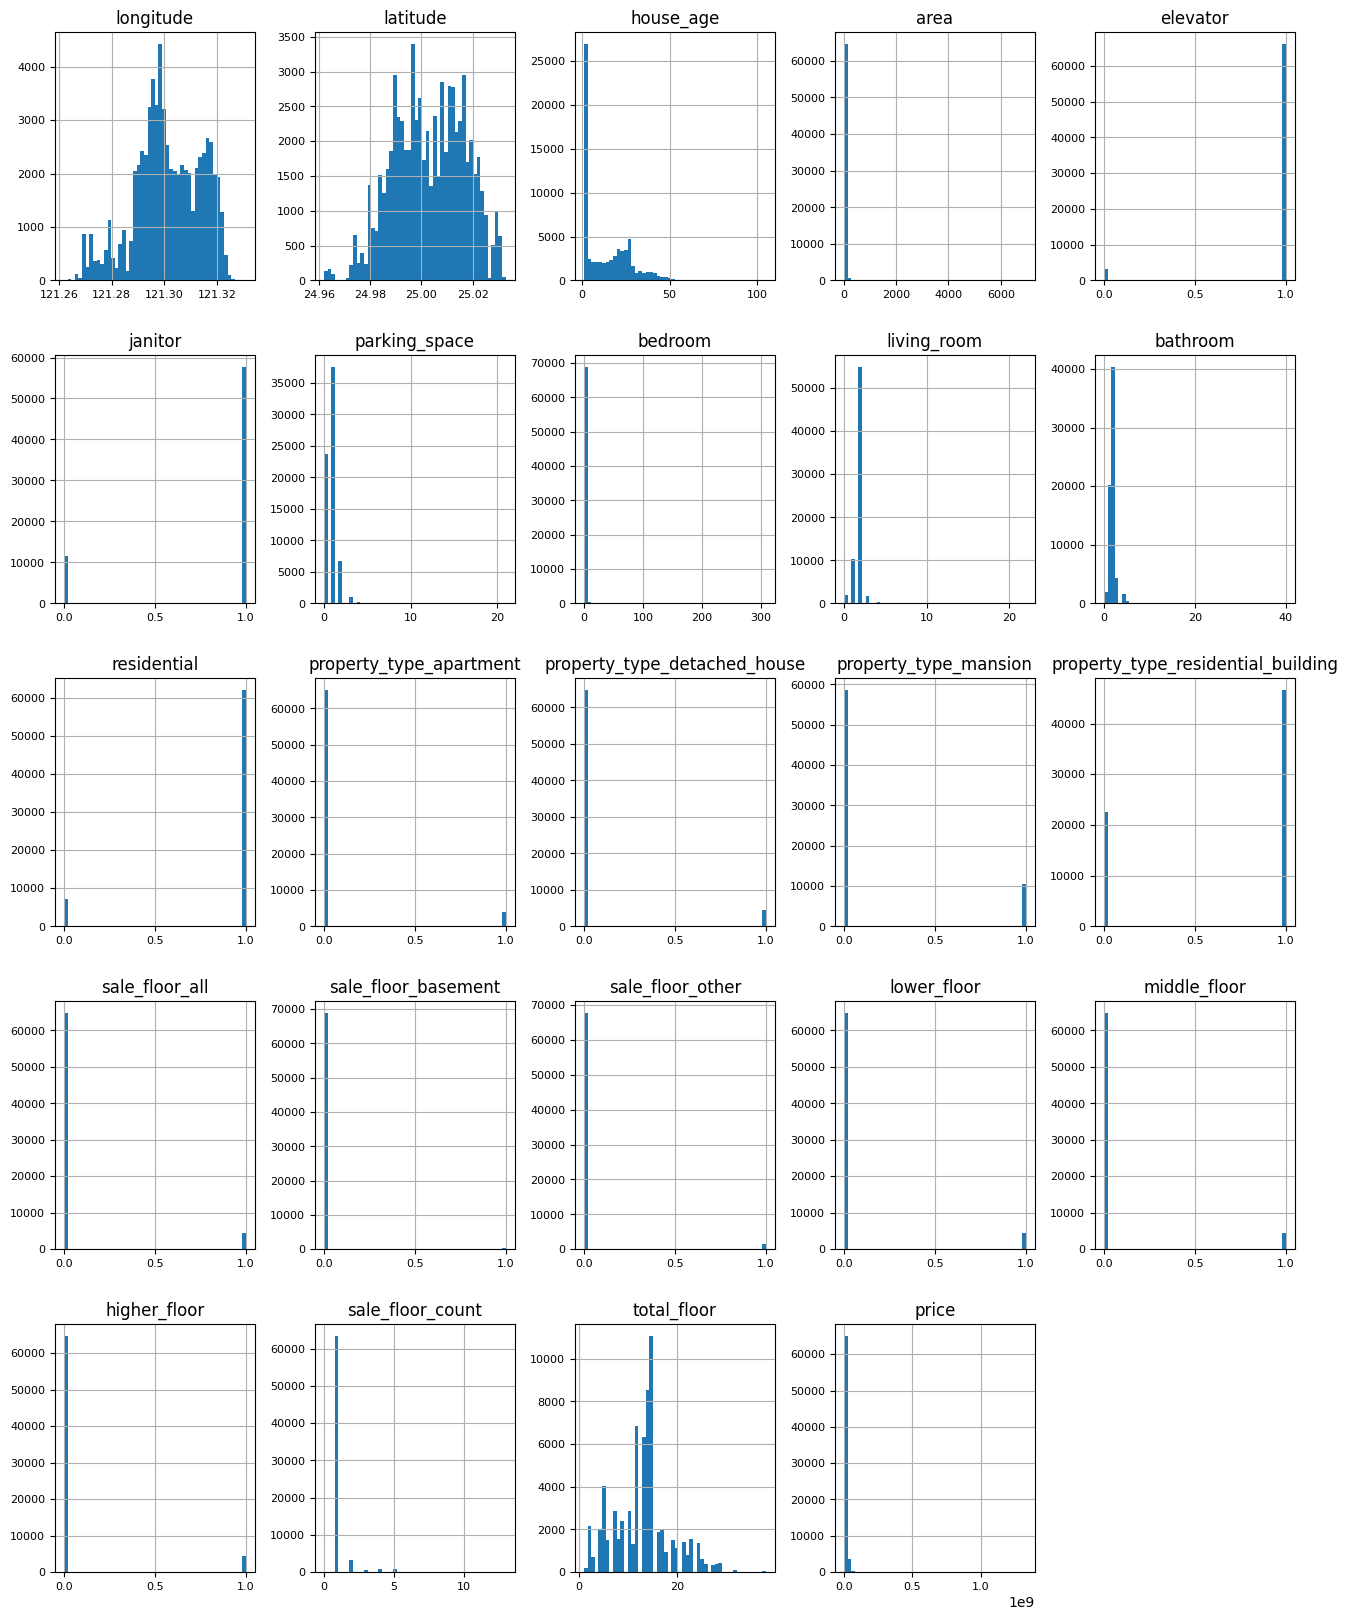

In [26]:
df = rec_df.copy()
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

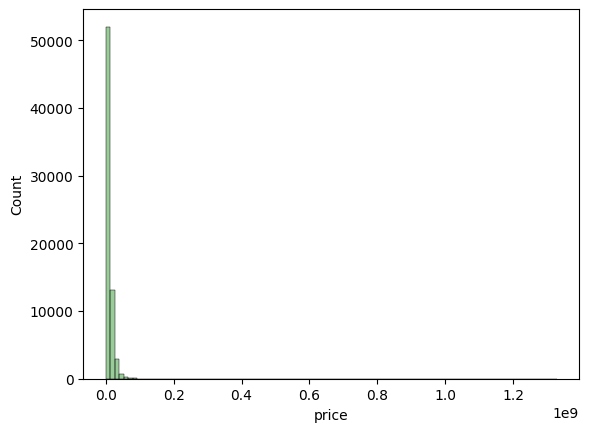

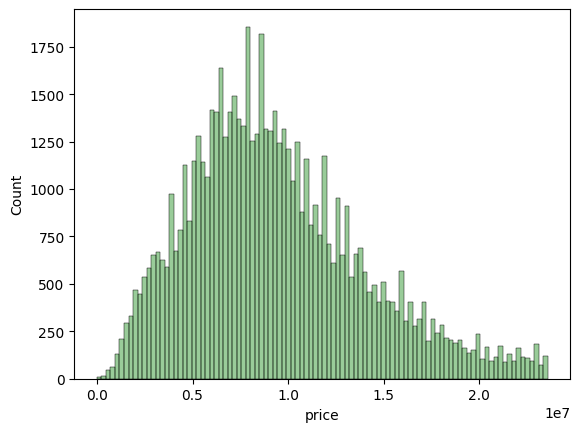

In [27]:


sns.histplot(df['price'], color='g', bins=100, alpha=0.4)
plt.show()

# 去掉 price 離群值
s = df['price'].describe()
IQR = s['75%'] - s['25%']
upper_bound = s['75%'] + IQR*1.5
lower_bound = s['25%'] - IQR*1.5
df = df[df['price'] < upper_bound]
df = df[df['price'] > lower_bound]

sns.histplot(df['price'], color='g', bins=100, alpha=0.4)
plt.show()

In [28]:
df['closing_year'] = df['closing_year'].astype(int)
for i in range(1, 11):
    filter_df = df[(df['closing_year'] > (112 - i))]
    filter_df.to_csv(f'./Basic-Preprocessed-Data/data-{i}-year.csv', index=False, encoding="utf_8_sig")

In [29]:
stock_df = pd.read_csv(f'../^TWII.csv')
df = pd.read_csv(f'./Basic-Preprocessed-Data/data-10-year.csv')

def convert_roc_to_ad(date_str):
    parts = date_str.split('/')
    if len(parts) == 3:
        year = int(parts[0]) + 1911
        return f"{year}/{parts[1]}/{parts[2]}"
    else:
        return None

df['date'] = df['date'].apply(convert_roc_to_ad) 

df['date'] = pd.to_datetime(df['date'])
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

df['YM'] = df['date'].dt.to_period('M')
stock_df['YM'] = stock_df['Date'].dt.to_period('M')

stock_df = stock_df[['YM', 'Close']]

df = pd.merge(df, stock_df, on='YM', how='left')

df = df.drop(columns=['date', 'YM'])
df = df.rename(columns={'Close': 'stock'})
price_column = df.pop('price')
df['price'] = price_column
df

,longitude,latitude,house_age,area,elevator,janitor,parking_space,closing_year,bedroom,living_room,...,sale_floor_all,sale_floor_basement,sale_floor_other,lower_floor,middle_floor,higher_floor,sale_floor_count,total_floor,stock,price
0,121.317090,25.004595,28.0,36.32,1,1,1,112,2,2,...,0,0,0,0,0,0,1,21,17433.849609,8200000
1,121.304275,25.014598,27.0,42.85,1,1,1,112,3,2,...,0,0,0,0,0,0,1,14,17433.849609,12320000
2,121.314721,24.996222,33.0,11.08,1,1,0,112,3,2,...,0,0,0,0,0,0,1,13,17433.849609,3150000
3,121.296165,24.999926,3.0,30.43,1,1,1,112,2,1,...,0,0,0,0,0,0,1,15,17433.849609,11000000
4,121.304086,25.018373,25.0,56.60,1,1,1,112,3,2,...,0,0,0,0,0,0,1,22,17433.849609,14800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63971,121.307326,24.994224,5.0,NaN,1,1,1,103,2,1,...,0,0,0,0,0,0,1,22,8462.570313,12470000
63972,121.307663,24.994305,1.0,NaN,1,1,1,103,2,1,...,0,0,0,0,0,0,1,22,8462.570313,12170000
63973,121.307365,24.994278,1.0,NaN,1,1,1,103,3,2,...,0,0,0,0,0,0,1,22,8462.570313,21700000
63974,121.307663,24.994305,1.0,NaN,1,1,1,103,2,1,...,0,0,0,0,0,0,1,22,8462.570313,12210000


In [30]:
columns_to_normalize = ['stock', 'longitude', 'latitude', 'house_age','area', 'parking_space', 'bedroom', 'living_room', 'bathroom', 'sale_floor_count', 'total_floor']

# 使用MinMaxScaler進行MinMax 歸一化
min_max_scaler = MinMaxScaler()
df[columns_to_normalize] = min_max_scaler.fit_transform(df[columns_to_normalize])
df[columns_to_normalize]

,stock,longitude,latitude,house_age,area,parking_space,bedroom,living_room,bathroom,sale_floor_count,total_floor
0,0.922571,0.799999,0.600955,0.259615,0.061828,0.058824,0.045455,0.10,0.034483,0.083333,0.714286
1,0.922571,0.614210,0.741554,0.250000,0.073021,0.058824,0.068182,0.10,0.068966,0.083333,0.464286
2,0.922571,0.765649,0.483264,0.307692,0.018564,0.000000,0.068182,0.10,0.068966,0.083333,0.428571
3,0.922571,0.496631,0.535321,0.019231,0.051732,0.058824,0.045455,0.05,0.034483,0.083333,0.500000
4,0.922571,0.611472,0.794603,0.230769,0.096591,0.058824,0.068182,0.10,0.068966,0.083333,0.750000
...,...,...,...,...,...,...,...,...,...,...,...
63971,0.037676,0.658436,0.455183,0.038462,NaN,0.058824,0.045455,0.05,0.034483,0.083333,0.750000
63972,0.037676,0.663321,0.456316,0.000000,NaN,0.058824,0.045455,0.05,0.034483,0.083333,0.750000
63973,0.037676,0.659012,0.455944,0.000000,NaN,0.058824,0.068182,0.10,0.068966,0.083333,0.750000
63974,0.037676,0.663321,0.456316,0.000000,NaN,0.058824,0.045455,0.05,0.034483,0.083333,0.750000


## Heatmap

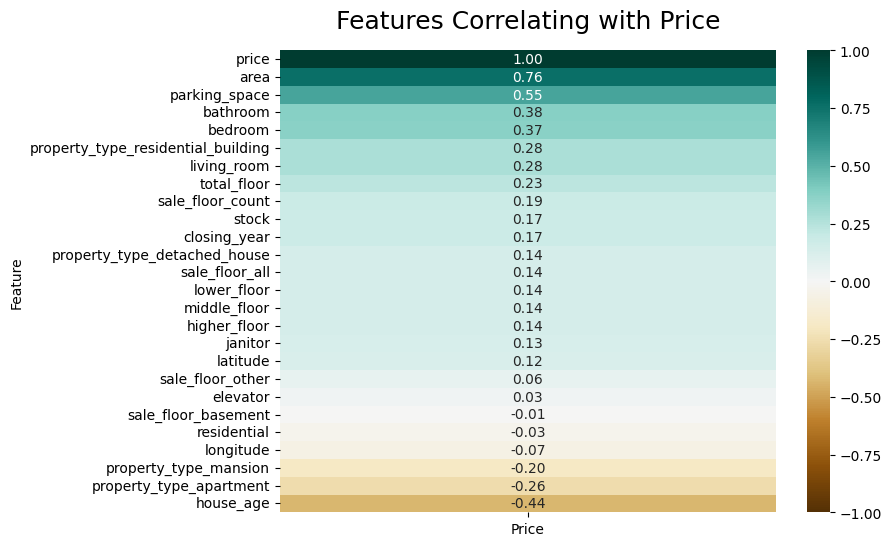

In [31]:
price_corr = df.corrwith(df['price'])
price_corr_df = pd.DataFrame({'Feature': price_corr.index, 'Correlation': price_corr.values})

sorted_corr_matrix = price_corr_df.sort_values(by='Correlation', ascending=False)
sorted_features = sorted_corr_matrix['Feature'].values

sorted_corr_values = df[sorted_features].corrwith(df['price'])
sorted_corr_df = pd.DataFrame({'Feature': sorted_features, 'Correlation': sorted_corr_values})

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(data=sorted_corr_df.set_index('Feature'), annot=True, cmap='BrBG', fmt=".2f", vmax=1, vmin=-1)
heatmap .set_xticks([0.5])
heatmap.set_xticklabels(['Price'], rotation=0, fontsize=10)
heatmap.set_title('Features Correlating with Price', fontdict={'fontsize':18}, pad=16);
plt.show()

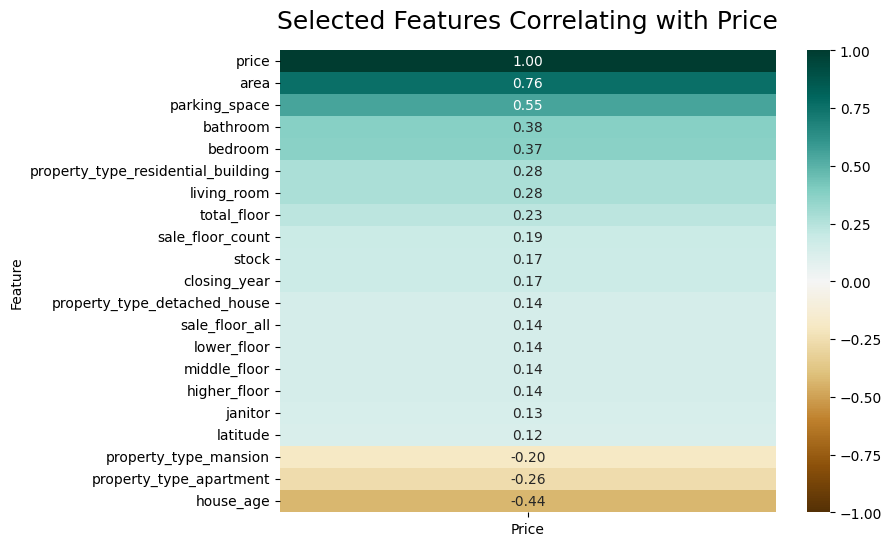

In [32]:
mask = (sorted_corr_df['Correlation'] <= -0.1) | (sorted_corr_df['Correlation'] >= 0.1)
masked_corr_df = sorted_corr_df[mask]

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(data=masked_corr_df.set_index('Feature'), annot=True, cmap='BrBG', fmt=".2f", vmax=1, vmin=-1)
heatmap .set_xticks([0.5])
heatmap.set_xticklabels(['Price'], rotation=0, fontsize=10)
heatmap.set_title('Selected Features Correlating with Price', fontdict={'fontsize':18}, pad=16);
plt.show()

In [33]:
low_corr_features = sorted_corr_df[abs(sorted_corr_df['Correlation']) < 0.1]['Feature'].values
df_filtered = df.drop(low_corr_features, axis=1)
df_filtered

,latitude,house_age,area,janitor,parking_space,closing_year,bedroom,living_room,bathroom,property_type_apartment,...,property_type_mansion,property_type_residential_building,sale_floor_all,lower_floor,middle_floor,higher_floor,sale_floor_count,total_floor,stock,price
0,0.600955,0.259615,0.061828,1,0.058824,112,0.045455,0.10,0.034483,0,...,0,1,0,0,0,0,0.083333,0.714286,0.922571,8200000
1,0.741554,0.250000,0.073021,1,0.058824,112,0.068182,0.10,0.068966,0,...,0,1,0,0,0,0,0.083333,0.464286,0.922571,12320000
2,0.483264,0.307692,0.018564,1,0.000000,112,0.068182,0.10,0.068966,0,...,0,1,0,0,0,0,0.083333,0.428571,0.922571,3150000
3,0.535321,0.019231,0.051732,1,0.058824,112,0.045455,0.05,0.034483,0,...,0,1,0,0,0,0,0.083333,0.500000,0.922571,11000000
4,0.794603,0.230769,0.096591,1,0.058824,112,0.068182,0.10,0.068966,0,...,0,1,0,0,0,0,0.083333,0.750000,0.922571,14800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63971,0.455183,0.038462,NaN,1,0.058824,103,0.045455,0.05,0.034483,0,...,0,1,0,0,0,0,0.083333,0.750000,0.037676,12470000
63972,0.456316,0.000000,NaN,1,0.058824,103,0.045455,0.05,0.034483,0,...,0,1,0,0,0,0,0.083333,0.750000,0.037676,12170000
63973,0.455944,0.000000,NaN,1,0.058824,103,0.068182,0.10,0.068966,0,...,0,1,0,0,0,0,0.083333,0.750000,0.037676,21700000
63974,0.456316,0.000000,NaN,1,0.058824,103,0.045455,0.05,0.034483,0,...,0,1,0,0,0,0,0.083333,0.750000,0.037676,12210000


In [34]:
# output normalized data
for i in range(1, 11):
    filtered_year_df = df[(df['closing_year'] > (112 - i))]
    filtered_year_df.to_csv(f'./Normalized-Data/data-{i}-year-normalized.csv', index=False, encoding="utf_8_sig")

In [35]:
df = pd.read_csv(f'./Normalized-Data/data-{10}-year-normalized.csv')
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_data.to_csv(f'./Train-10/Training-data-{10}-year.csv', index=False, encoding="utf_8_sig")
test_data.to_csv(f'./Train-10/Testing-data-{10}-year.csv', index=False, encoding="utf_8_sig")

In [36]:
df = pd.read_csv(f'./Normalized-Data/data-{10}-year-normalized.csv')
train_data = df[(df['closing_year'] <= 109) & (df['closing_year'] >= 103)]
train_data = train_data.drop(columns=['stock'])
train_data.to_csv(f'./Train-7-Predict-3/no-stock/Training-data-103-109.csv', index=False, encoding="utf_8_sig")
test_data = df[(df['closing_year'] <= 112) & (df['closing_year'] >= 110)]
test_data = test_data.drop(columns=['stock'])
test_data.to_csv(f'./Train-7-Predict-3/no-stock/Testing-data-110-112.csv', index=False, encoding="utf_8_sig")

In [37]:
df = pd.read_csv(f'./Normalized-Data/data-{10}-year-normalized.csv')

train_data = df[(df['closing_year'] <= 109) & (df['closing_year'] >= 103)]
train_data.to_csv(f'./Train-7-Predict-3/stock/Training-data-103-109.csv', index=False, encoding="utf_8_sig")
test_data = df[(df['closing_year'] <= 112) & (df['closing_year'] >= 110)];
test_data.to_csv(f'./Train-7-Predict-3/stock/Testing-data-110-112.csv', index=False, encoding="utf_8_sig")
